In [1]:
import numpy as np
import pandas as pd
import random
import operator
import matplotlib.pyplot as plt
import time

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis **2) + (yDis**2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
    
    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                
                pathDistance += fromCity.distance(toCity)
            
            self.distance = pathDistance
            return self.distance 
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.routeDistance())
        return self.fitness

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

def initialPopulation(popSize, cityList):
    population = []
    
    for i in range(0, popSize):
        population.append(createRoute(cityList))
        
    return population

In [5]:
def rankRoutes(population):
    fitnessResults = {}
    
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    
    print(fitnessResults)
    
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse=True)

In [6]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [7]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [8]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [9]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [10]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [11]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [21]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    start_time = time.time()
    popRanked = rankRoutes(currentGen)
    print(time.time() - start_time)
    
    start_time = time.time()
    selectionResults = selection(popRanked, eliteSize)
    print(time.time() - start_time)
    
    start_time = time.time()
    matingpool = matingPool(currentGen, selectionResults)
    print(time.time() - start_time)
    
    start_time = time.time()
    children = breedPopulation(matingpool, eliteSize)
    print(time.time() - start_time)
    
    start_time = time.time()
    nextGeneration = mutatePopulation(children, mutationRate)
    print(time.time() - start_time)
    
    return nextGeneration

In [13]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [14]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [21]:
print(cityList)

[(93,199), (6,158), (27,70), (132,45), (180,132), (31,15), (69,106), (74,190), (22,38), (121,96), (174,94), (87,151), (5,30), (81,149), (19,124), (1,174), (62,191), (91,70), (133,82), (89,88), (96,80), (176,40), (136,100), (135,50), (35,2)]


# Load Cities

In [15]:
df_cities = pd.read_csv('data/cities.csv')

In [16]:
df_cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [18]:
cityList2 = []

for i in range(0,df_cities.shape[0]):
    cityList2.append(City(x=df_cities.iloc[i]['X'], y=df_cities.iloc[i]['Y']))

In [19]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

{0: 0.0003572838666899729, 1: 0.00039936703652356957, 2: 0.0003738879893036302, 3: 0.0003505324027646738, 4: 0.00035113183873986643, 5: 0.000427936922839061, 6: 0.00038112637505942413, 7: 0.0003644199135020123, 8: 0.0003726614394304053, 9: 0.0003857650835182519, 10: 0.00037509537815614836, 11: 0.00035186432123603844, 12: 0.0003669192279053404, 13: 0.00035739254622124764, 14: 0.0003934246752946717, 15: 0.00034129257909013504, 16: 0.0003837051024885045, 17: 0.00035971131974603355, 18: 0.0003271301087898407, 19: 0.0003032834755699168, 20: 0.00032511514105105913, 21: 0.00038856749629391485, 22: 0.0004237281930843853, 23: 0.0004069847359751678, 24: 0.0003475803940695542, 25: 0.0003455180532119434, 26: 0.00034831023953494456, 27: 0.00037199728625559306, 28: 0.00035045351003956074, 29: 0.0003274678730740666, 30: 0.0003985945729957998, 31: 0.0003582646650814422, 32: 0.000336146944502536, 33: 0.0003887277982024768, 34: 0.0003287182081874964, 35: 0.0003396548198127719, 36: 0.00034245880561116737

0.03347516059875488
2.288818359375e-05
0.0008556842803955078
0.00044608116149902344
{0: 0.0004858357518462484, 1: 0.00048320701733509276, 2: 0.00048296417134304734, 3: 0.00047287231150719406, 4: 0.000489811984711978, 5: 0.0004594096311019742, 6: 0.000458698412577135, 7: 0.0004518902394687654, 8: 0.000448034192812181, 9: 0.0004458524967932846, 10: 0.0003749213715639933, 11: 0.00044560635495719756, 12: 0.00038242485546315585, 13: 0.0003887905373767334, 14: 0.0003744307534751309, 15: 0.0004324229297052381, 16: 0.00045003486533998807, 17: 0.00039750888095345654, 18: 0.0003442987606081067, 19: 0.00043090267825875964, 20: 0.0003746994420125313, 21: 0.000415550348389398, 22: 0.00044839314825017516, 23: 0.00043734180278005234, 24: 0.00033181237876234317, 25: 0.00041871348448162585, 26: 0.0003417609725774692, 27: 0.00037727308650501096, 28: 0.0004551799373794289, 29: 0.0003590565672966586, 30: 0.00041579670466782855, 31: 0.00041642965131872926, 32: 0.00036271092619913136, 33: 0.0004594096311019

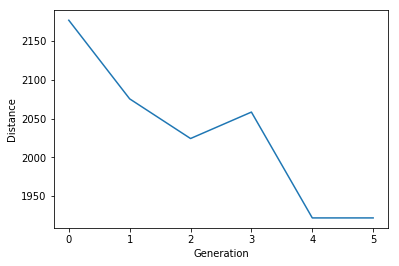

In [24]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=10, mutationRate=0.01, generations=5)